#CHE1148

###Assignment 4 - Unsupervised learning via Clustering algorithms


Student name: Ashutosh Desai

Student number: 1004774041

In [ ]:
#Load the ‘Carbig’ data set* from the Matlab library or from the Carbig.txt file* on the Quercus home page for this course. (Column order: Acceleration, Cylinders, Displacement, Horsepower, MPG, Weight)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install scipy
from sklearn.preprocessing import StandardScaler
import seaborn as sns

link = 'https://raw.githubusercontent.com/ashutoshdesai/processdata_a4/main/Carbig.csv'
df = pd.read_csv(link)
df

,Acceleration,Cylinders,Displacement,Horsepower,MPG,Weight
0,12.0,8.0,307.0,130.0,18.0,3500.0
1,11.5,8.0,350.0,165.0,15.0,3690.0
2,11.0,8.0,318.0,150.0,18.0,3440.0
3,12.0,8.0,304.0,150.0,16.0,3430.0
4,10.5,8.0,302.0,140.0,17.0,3450.0
...,...,...,...,...,...,...
401,15.6,4.0,140.0,86.0,27.0,2790.0
402,24.6,4.0,97.0,52.0,44.0,2130.0
403,11.6,4.0,135.0,84.0,32.0,2300.0
404,18.6,4.0,120.0,79.0,28.0,2630.0


In [ ]:
#Preprocess and sort this data and then explore different ways of displaying this data. Separate or segment the data so that you have all the features for 4, 6 and 8 cylinder cars.
#Eliminating other classes except 4,5 and 6
indexNames = df[(df['Cylinders'] == 3.0)].index
df.drop(indexNames,inplace=True)
indexNames = df[(df['Cylinders'] == 5.0)].index
df.drop(indexNames,inplace=True)
df = df.dropna(how='any',axis=0)
df

,Acceleration,Cylinders,Displacement,Horsepower,MPG,Weight
0,12.0,8.0,307.0,130.0,18.0,3500.0
1,11.5,8.0,350.0,165.0,15.0,3690.0
2,11.0,8.0,318.0,150.0,18.0,3440.0
3,12.0,8.0,304.0,150.0,16.0,3430.0
4,10.5,8.0,302.0,140.0,17.0,3450.0
...,...,...,...,...,...,...
401,15.6,4.0,140.0,86.0,27.0,2790.0
402,24.6,4.0,97.0,52.0,44.0,2130.0
403,11.6,4.0,135.0,84.0,32.0,2300.0
404,18.6,4.0,120.0,79.0,28.0,2630.0


Data set without NaN values and without all unnecessary classes expect 4,6 and 8 cylinders

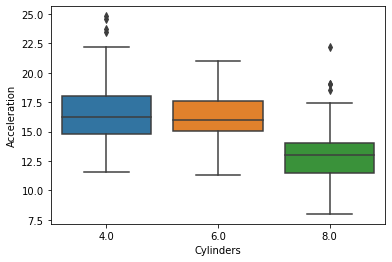

In [ ]:
#To identify which features to consider (all or just a few) use the ‘boxplot’ function to see which variables (features) to use so that the data would cluster well.
ax = sns.boxplot(x=df['Cylinders'], y=df['Acceleration'], data=df)

The mean of cylinder 4 and 6 cars coincide pretty much for the acceleration feature

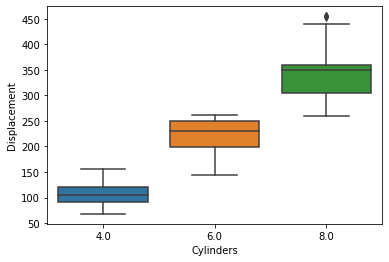

In [ ]:
ax = sns.boxplot(x=df['Cylinders'], y=df['Displacement'], data=df)

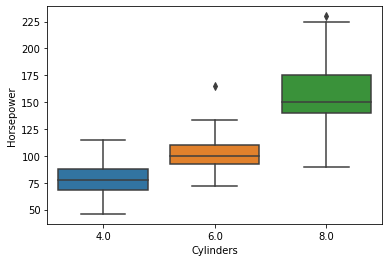

In [ ]:
ax = sns.boxplot(x=df['Cylinders'], y=df['Horsepower'], data=df)

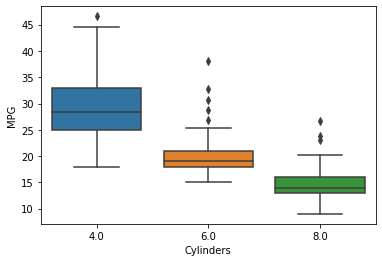

In [ ]:
ax = sns.boxplot(x=df['Cylinders'], y=df['MPG'], data=df)

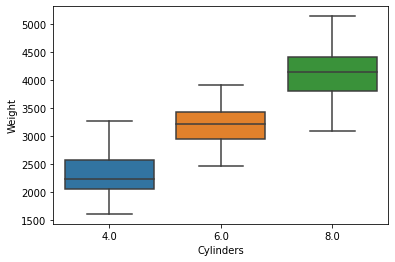

In [ ]:
ax = sns.boxplot(x=df['Cylinders'], y=df['Weight'], data=df)

It can be concluded from the box plots that the main features are, **Displacement, Horsepower, MPG** and **Weight**.

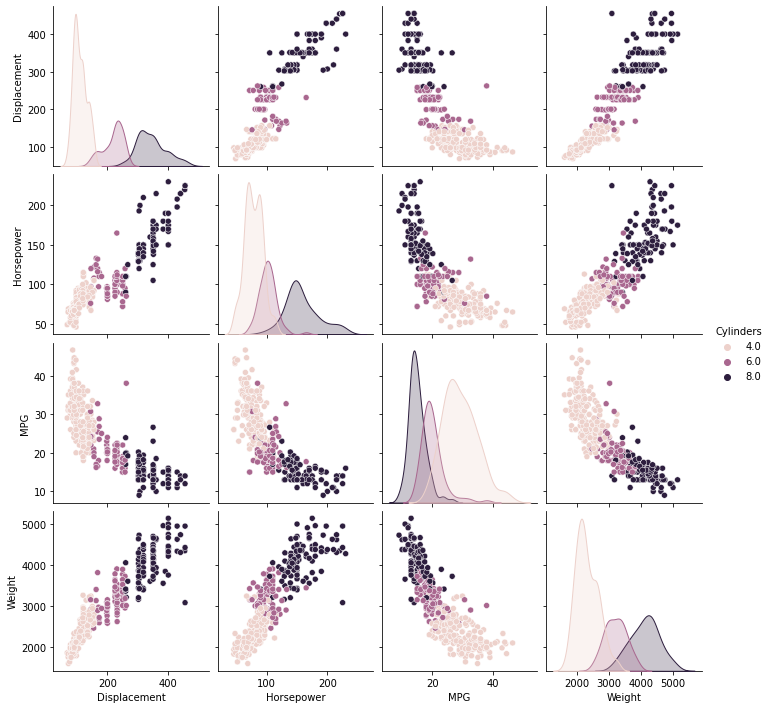

In [ ]:
df1 = df.copy()
df1.drop(columns = 'Acceleration',inplace=True)
sns.pairplot(df1, hue="Cylinders")

Visualizing all the features considered for the model.

In [ ]:
X = df1.copy()
X.drop(columns = 'Cylinders',inplace=True) #X is an array without cylinders and acceleration
y = df['Cylinders'] #y is an array with cylinders only

In [ ]:
scaler = StandardScaler().fit(X)
X1 = scaler.transform(X)
X1=pd.DataFrame(X1, columns=['Displacement','Horsepower','MPG','Weight'])
X1 #Standardized data

,Displacement,Horsepower,MPG,Weight
0,1.060686,0.653742,-0.695751,0.605214
1,1.471819,1.557988,-1.079053,0.828008
2,1.165860,1.170454,-0.695751,0.534858
3,1.032003,1.170454,-0.951286,0.523132
4,1.012880,0.912098,-0.823519,0.546584
...,...,...,...,...
380,-0.536037,-0.483025,0.454155,-0.227332
381,-0.947169,-1.361436,2.626200,-1.001249
382,-0.583843,-0.534696,1.092991,-0.801907
383,-0.727261,-0.663874,0.581922,-0.414948


The dataset shown above contains standardized data of the original dataset. This is important for applying clustering algorithm on the dataset.

##K-Means Clustering

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


The Mean Silhouette Coefficient for all samples (for 2.00 clusters) is 0.55


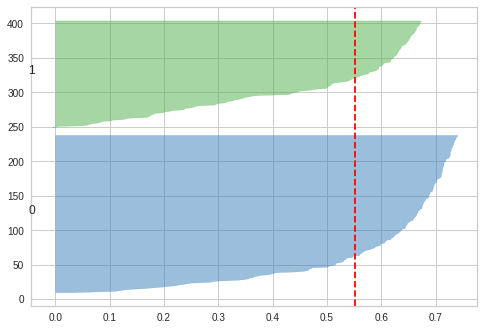

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

no_of_clusters = [2,3,4,5,6]
sil_score = []

kmeans = KMeans(n_clusters = no_of_clusters[0], random_state=0).fit(X1)
labels = kmeans.labels_

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X1)        # Fit the data to the visualizer

s_sc = silhouette_score(X1,labels,metric='euclidean')
sil_score.append(s_sc)
print('The Mean Silhouette Coefficient for all samples (for %.2f clusters) is %.2f'%(no_of_clusters[0],s_sc))

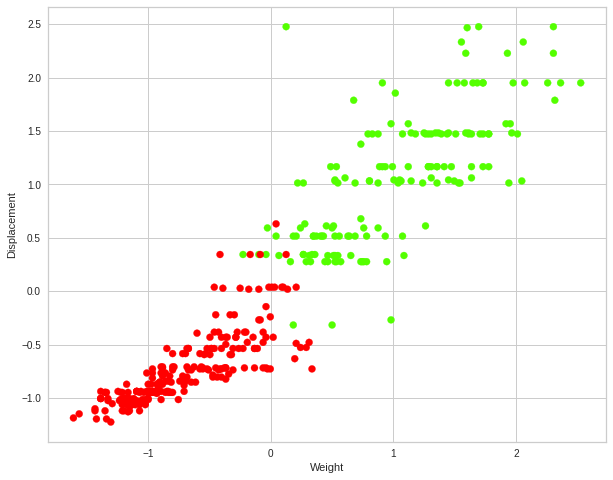

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X1['Weight'], X1['Displacement'], c=labels, cmap='prism')  # plot points with cluster dependent colors
plt.xlabel("Weight")
plt.ylabel("Displacement")
plt.show()

The Mean Silhouette Coefficient for all samples (for 3.00 clusters) is 0.46


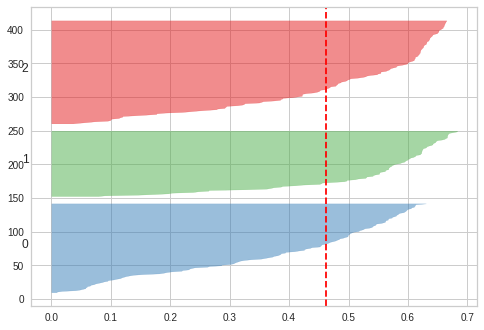

In [ ]:
kmeans = KMeans(n_clusters = no_of_clusters[1], random_state=0).fit(X1)
labels = kmeans.labels_

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X1)        # Fit the data to the visualizer

s_sc = silhouette_score(X1,labels,metric='euclidean')
sil_score.append(s_sc)
print('The Mean Silhouette Coefficient for all samples (for %.2f clusters) is %.2f'%(no_of_clusters[1],s_sc))

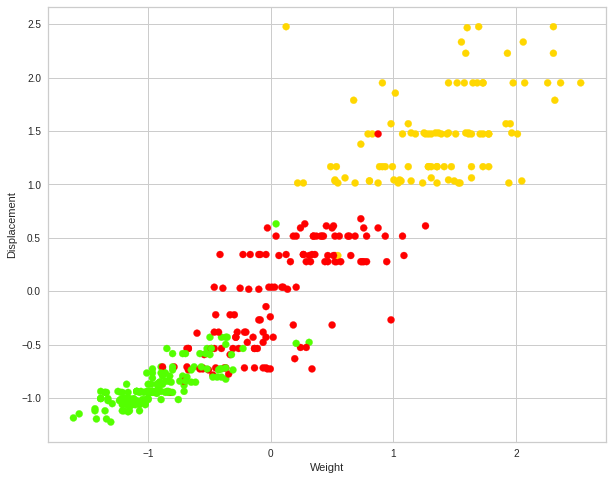

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X1['Weight'], X1['Displacement'], c=labels, cmap='prism')  # plot points with cluster dependent colors
plt.xlabel("Weight")
plt.ylabel("Displacement")
plt.show()

The Mean Silhouette Coefficient for all samples (for 4.00 clusters) is 0.42


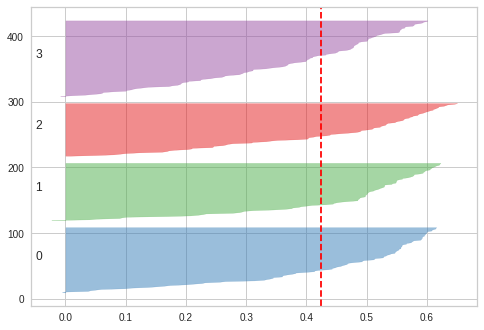

In [ ]:
kmeans = KMeans(n_clusters = no_of_clusters[2], random_state=0).fit(X1)
labels = kmeans.labels_

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X1)        # Fit the data to the visualizer

s_sc = silhouette_score(X1,labels,metric='euclidean')
sil_score.append(s_sc)
print('The Mean Silhouette Coefficient for all samples (for %.2f clusters) is %.2f'%(no_of_clusters[2],s_sc))

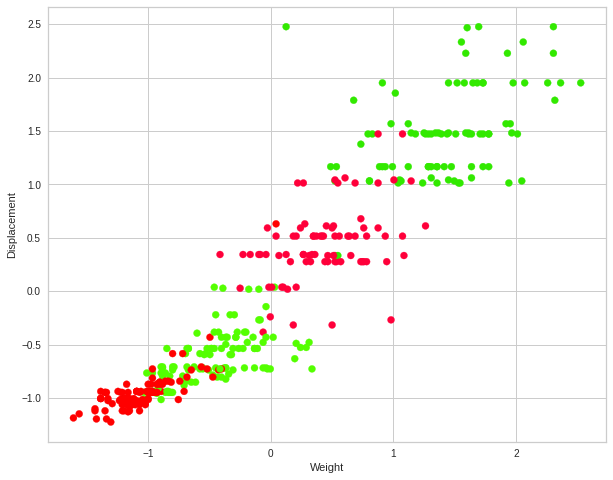

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X1['Weight'], X1['Displacement'], c=labels, cmap='prism')  # plot points with cluster dependent colors
plt.xlabel("Weight")
plt.ylabel("Displacement")
plt.show()

The Mean Silhouette Coefficient for all samples (for 5.00 clusters) is 0.41


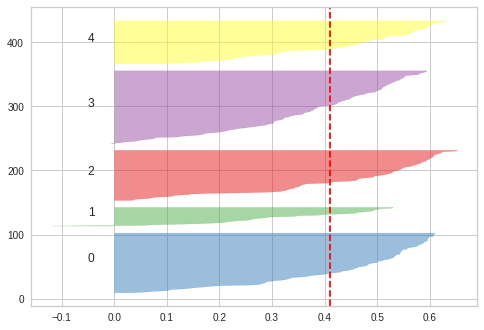

In [ ]:
kmeans = KMeans(n_clusters = no_of_clusters[3], random_state=0).fit(X1)
labels = kmeans.labels_

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X1)        # Fit the data to the visualizer

s_sc = silhouette_score(X1,labels,metric='euclidean')
sil_score.append(s_sc)
print('The Mean Silhouette Coefficient for all samples (for %.2f clusters) is %.2f'%(no_of_clusters[3],s_sc))

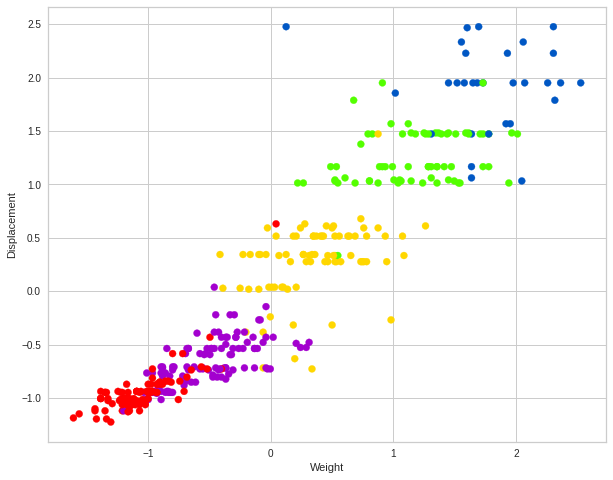

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X1['Weight'], X1['Displacement'], c=labels, cmap='prism')  # plot points with cluster dependent colors
plt.xlabel("Weight")
plt.ylabel("Displacement")
plt.show()

The Mean Silhouette Coefficient for all samples (for 6.00 clusters) is 0.36


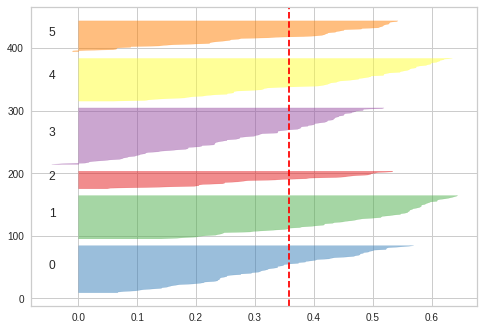

In [ ]:
kmeans = KMeans(n_clusters = no_of_clusters[4], random_state=0).fit(X1)
labels = kmeans.labels_

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X1)        # Fit the data to the visualizer

s_sc = silhouette_score(X1,labels,metric='euclidean')
sil_score.append(s_sc)
print('The Mean Silhouette Coefficient for all samples (for %.2f clusters) is %.2f'%(no_of_clusters[4],s_sc))

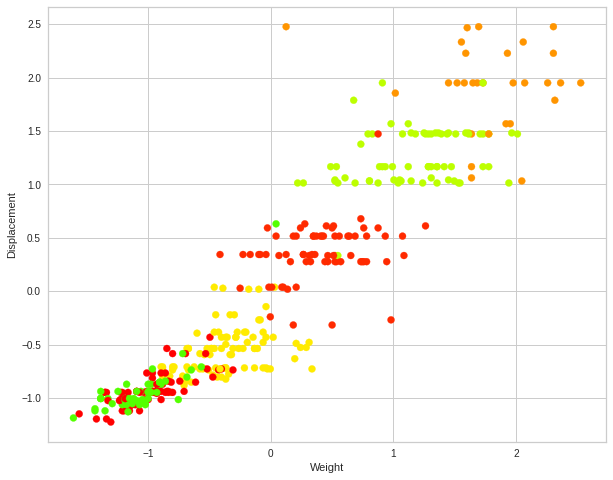

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X1['Weight'], X1['Displacement'], c=labels, cmap='prism')  # plot points with cluster dependent colors
plt.xlabel("Weight")
plt.ylabel("Displacement")
plt.show()

In this K-means clustering algorithm, an exercise was performed to find a good value of the number of clusters. Silhouette plots and Mean Silhouette coefficient were evaluated for different scenarios having different number of cluster estimates. 

From the observations, it can be inferred that the model with **3 cluster** estimate shows the best results.
1. The mean Silhouette coefficient is as close to 1 as possible
2. All cluster plots are above the mean value
3. The width of each cluster plot is as uniform in thickness as possible.
4. Silhoutte value of any data point is NOT below zero value.

The 2 cluster scenario looks good as well, but a few data point Sihouette values for the 1st cluster are going below zero.

##Hierarchial Clustering

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.cluster.hierarchy import inconsistent
from scipy.cluster.hierarchy import fcluster
from matplotlib import pyplot as plt

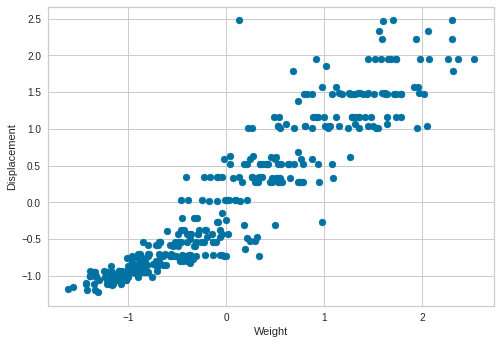

In [ ]:
plt.scatter(X1['Weight'], X1['Displacement'])
plt.xlabel("Weight")
plt.ylabel("Displacement")
plt.show()

In [ ]:
methods = ['single','complete','average','weighted']
metrics = ['euclidean','cityblock','sqeuclidean','cosine','correlation']

methods_tab = []
metrics_tab = []
cop = []

for i in methods:
  for j in metrics:
    z = linkage(X1, method = i, metric = j)
    c, coph_dists = cophenet(z, pdist(X1, metric=j))
    methods_tab.append(i)
    metrics_tab.append(j)
    cop.append(c)

In [ ]:
parameter_selection = pd.DataFrame(columns = ['Method','Metric','Cophenetic Correlation Coefficient'])
parameter_selection['Method'] = np.array(methods_tab)
parameter_selection['Metric'] = np.array(metrics_tab)
parameter_selection['Cophenetic Correlation Coefficient'] = np.array(cop)
parameter_selection

,Method,Metric,Cophenetic Correlation Coefficient
0,single,euclidean,0.448368
1,single,cityblock,0.504031
2,single,sqeuclidean,0.264462
3,single,cosine,0.859065
4,single,correlation,0.940321
5,complete,euclidean,0.707555
6,complete,cityblock,0.767194
7,complete,sqeuclidean,0.603350
8,complete,cosine,0.768997
9,complete,correlation,0.824964


In [ ]:
# generate the linkage matrix and find cophenetic coefficient
Z1 = linkage(X1, method = 'complete', metric = 'correlation')
c1, coph_dists = cophenet(Z1, pdist(X1, metric='correlation'))
c1

0.8249644446512563

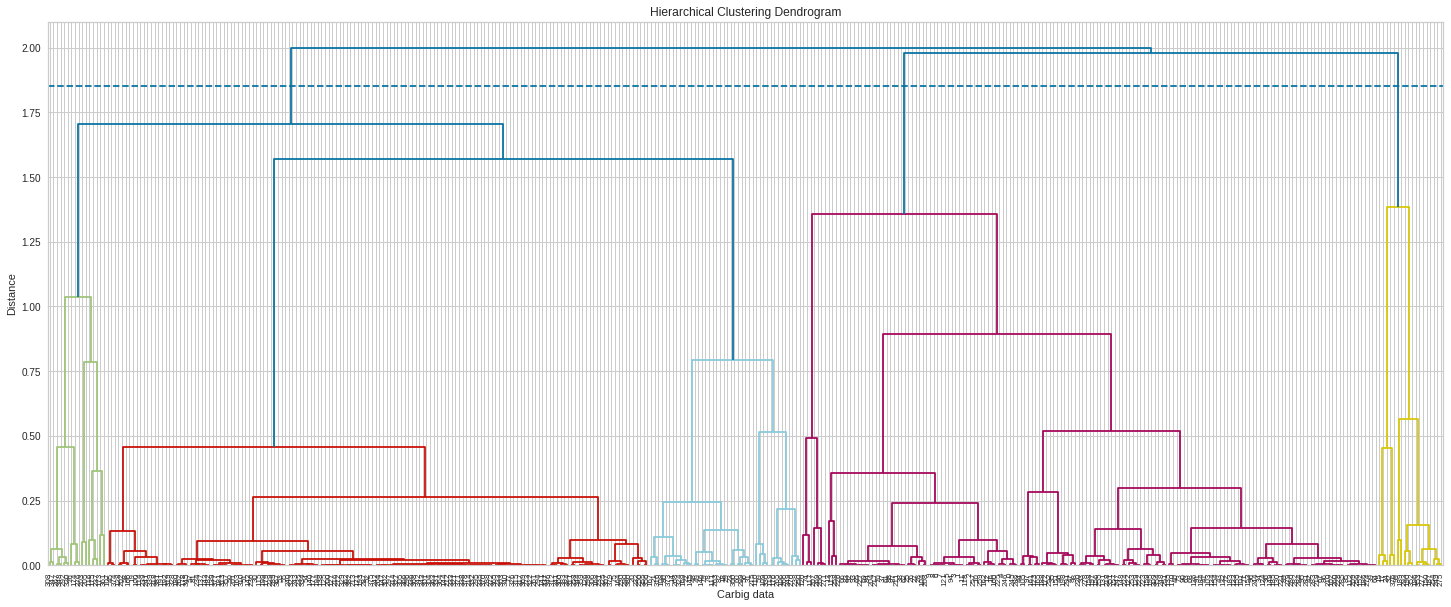

In [ ]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Carbig data')
plt.ylabel('Distance')
dendrogram(
    Z1,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.axhline(y=1.85, color='b', linestyle='--') #manual theshold created through visualization
plt.show()

In [ ]:
# generate the linkage matrix and find cophenetic coefficient
Z2 = linkage(X1, method = 'single', metric = 'correlation')
c2, coph_dists = cophenet(Z2, pdist(X1, metric='correlation'))
c2

0.9403207880793135

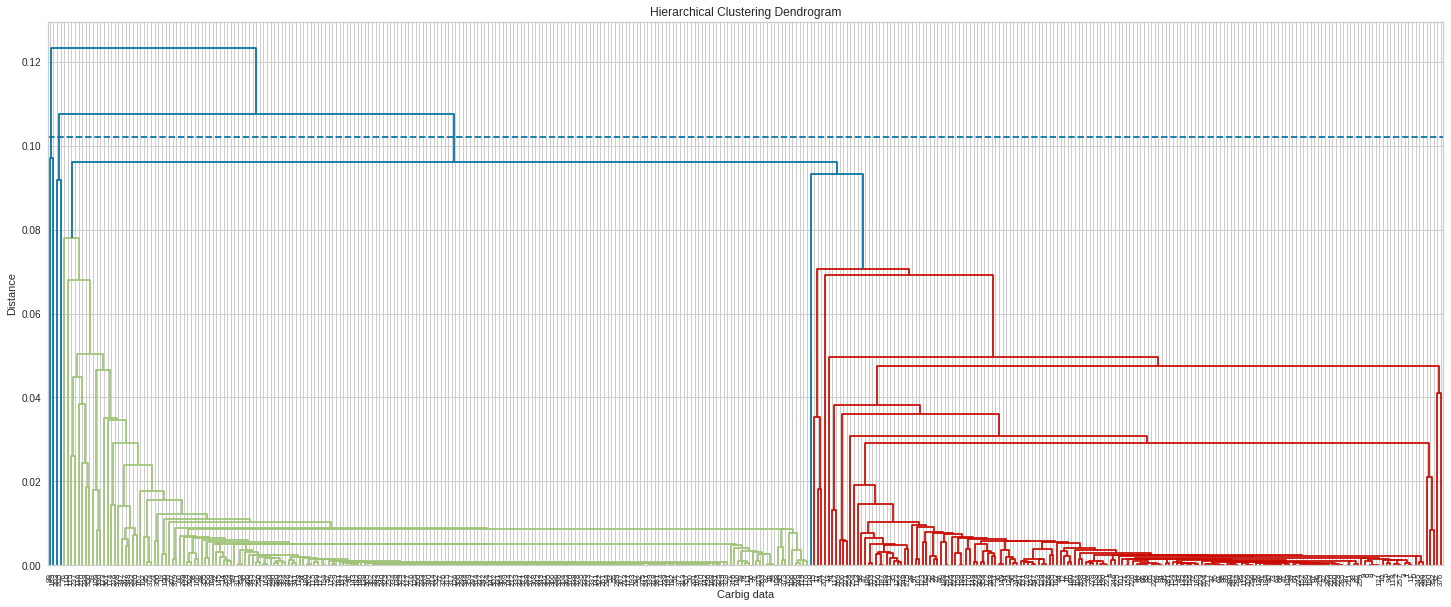

In [ ]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Carbig data')
plt.ylabel('Distance')
dendrogram(
    Z2,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.axhline(y=0.102, color='b', linestyle='--') #manual theshold created through visualization
plt.show()

In [ ]:
# generate the linkage matrix and find cophenetic coefficient
Z3 = linkage(X1, method = 'average', metric = 'cityblock')
c3, coph_dists = cophenet(Z3, pdist(X1, metric='cityblock'))
c3

0.787497898107657

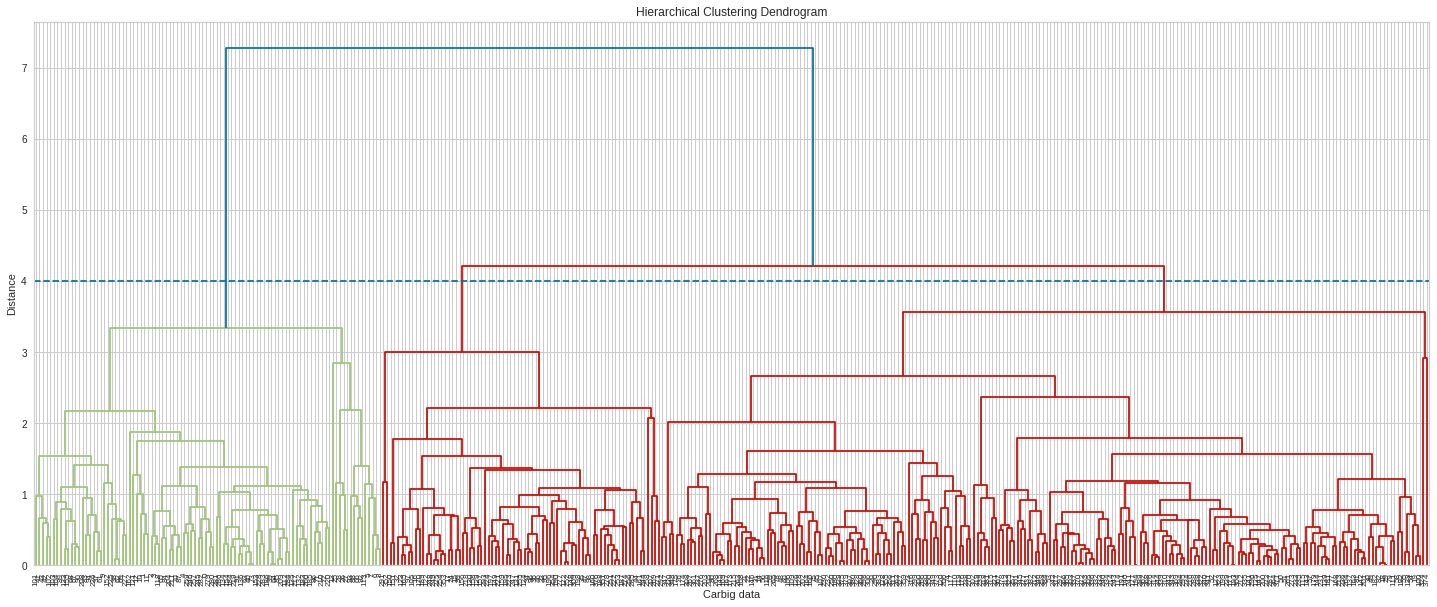

In [ ]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Carbig data')
plt.ylabel('Distance')
dendrogram(
    Z3,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.axhline(y=4, color='b', linestyle='--') #manual theshold created through visualization
plt.show()

In [ ]:
# generate the linkage matrix and find cophenetic coefficient
Z4 = linkage(X1, method = 'ward', metric = 'euclidean')
c4, coph_dists = cophenet(Z4, pdist(X1, metric='euclidean'))
c4

0.7039745827636523

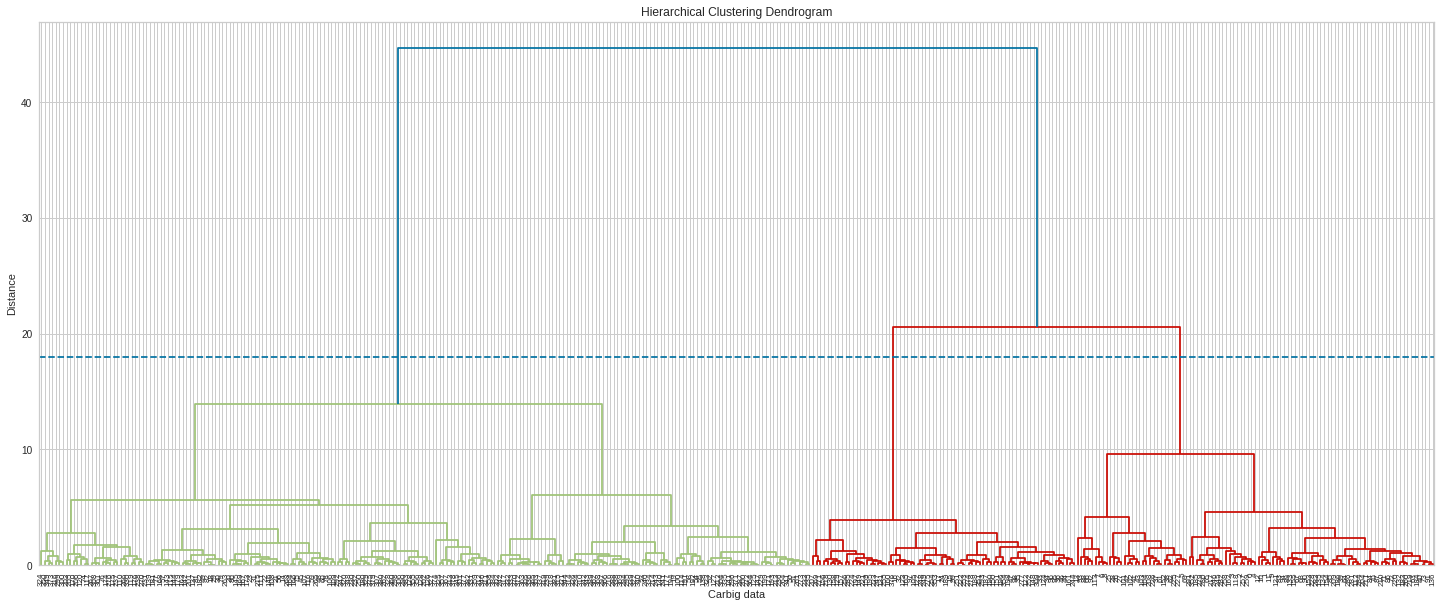

In [ ]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Carbig data')
plt.ylabel('Distance')
dendrogram(
    Z4,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.axhline(y=18, color='b', linestyle='--') #manual theshold created through visualization
plt.show()

From the dendogram shown above, it can be concluded that, till the euclidean distance 5, the cluster linkages are highly consistent as there is no significant difference in the branch lengths. The consistency reduces as the distance increases. At y(Distance) = 18, the cluster linkages are so inconsistent that a threshold can be constructed which eventally gives 3 clusters. 

The inconsistent matrix analysis below also shows that if the **depth of the inconsistent matrix is kept as 4**, we can get **3 distinct clusters** when a **threshold of 3.2** is considered.

In [ ]:
# generate the linkage matrix and find cophenetic coefficient
Z5 = linkage(X1, method = 'weighted', metric = 'cityblock')
c5, coph_dists = cophenet(Z5, pdist(X1, metric='cityblock'))
c5

0.7239208372969661

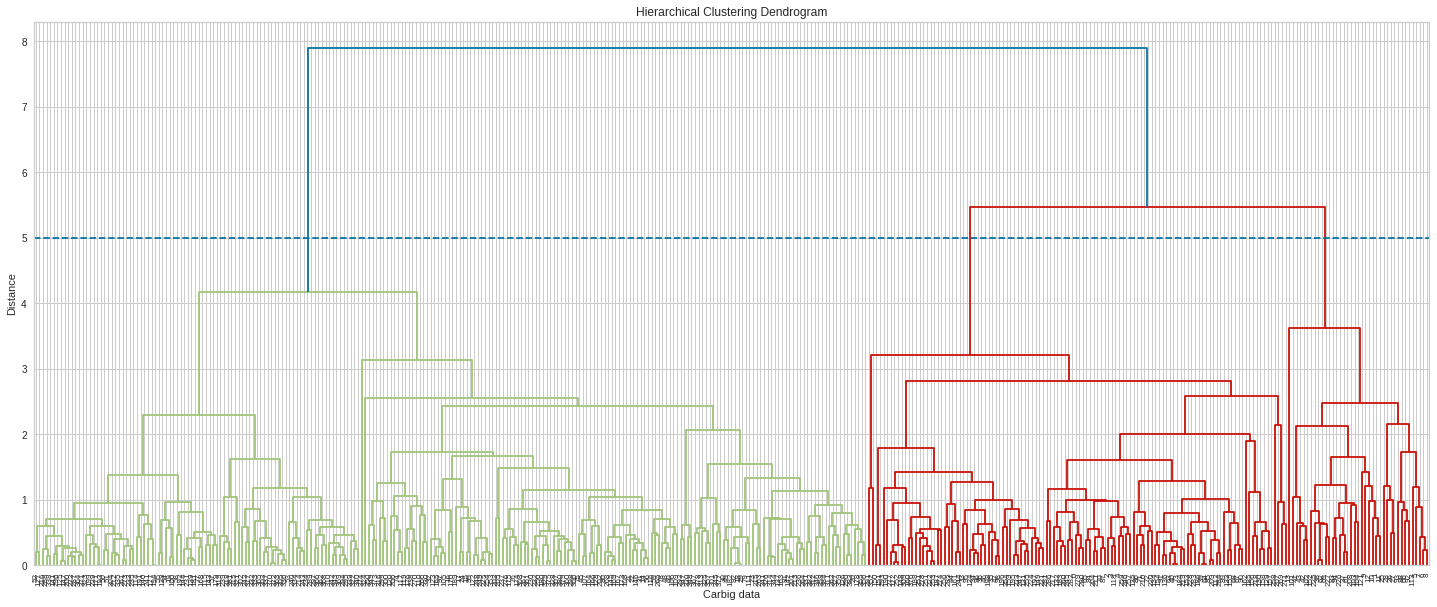

In [ ]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Carbig data')
plt.ylabel('Distance')
dendrogram(
    Z5,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.axhline(y=5, color='b', linestyle='--') #manual theshold created through visualization
plt.show()

In [ ]:
Z4 = linkage(X1, method = 'ward', metric = 'euclidean')
inc = inconsistent(Z4,d=4)
#inc
clusters_1 = fcluster(Z4, 3.2, criterion='inconsistent',R = inc)
set(clusters_1)

{1, 2, 3}

In [ ]:
clusters = fcluster(Z4, 3, criterion='maxclust')
set(clusters)

{1, 2, 3}

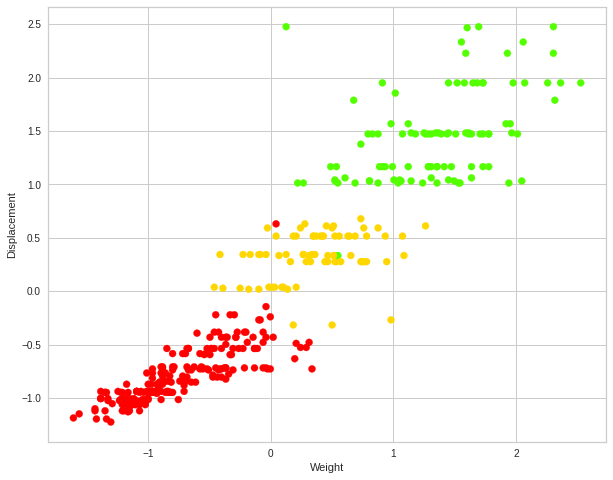

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X1['Weight'], X1['Displacement'], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.xlabel("Weight")
plt.ylabel("Displacement")
plt.show()

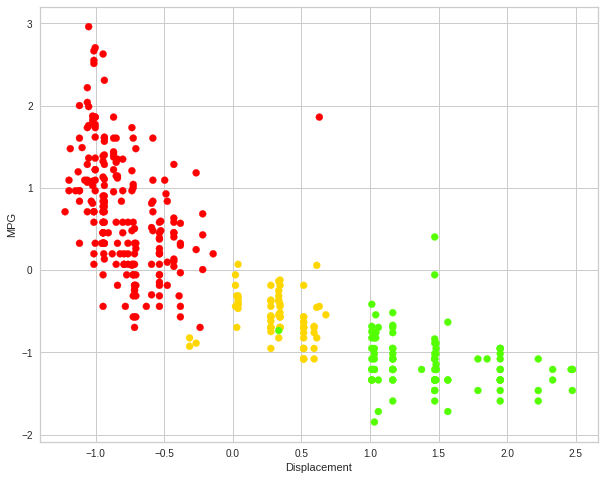

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X1['Displacement'], X1['MPG'], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.xlabel("Displacement")
plt.ylabel("MPG")
plt.show()

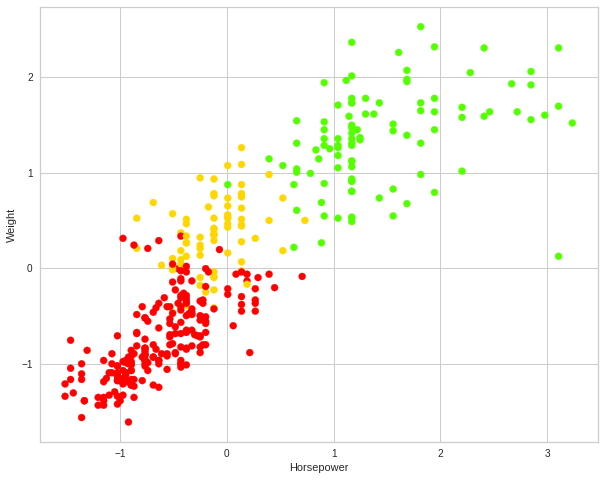

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X1['Horsepower'], X1['Weight'], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.xlabel("Horsepower")
plt.ylabel("Weight")
plt.show()

The three feature plots shown above represent the visual efficiency of the model. 3 distinct clusters can be observed which is the aim of the exercise.